# Problem 1: Basics of Neural Networks
* <b>Learning Objective:</b> In this problem, you are asked to implement a basic multi-layer fully connected neural network from scratch, including forward and backward passes of certain essential layers, to perform an image classification task on CIFAR-10 dataset. You need to implement essential functions in different indicated python files under directory `lib`.
* <b>Provided Code:</b> We provide the skeletons of classes you need to complete. Forward checking and gradient checkings are provided for verifying your implementation as well.
* <b>TODOs:</b> You are asked to implement the forward passes and backward passes for standard layers and loss functions, various widely-used optimizers, and part of the training procedure. And finally we want you to train a network from scratch on your own.

In [1]:
from lib.fully_conn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.datasets import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading the data (CIFAR-10)
Run the following code block to download CIFAR-10 dataset and load in the properly splitted CIFAR-10 data.

In [2]:
!./get_datasets.sh
data = CIFAR10_data()
for k, v in data.items():
    print ("Name: {} Shape: {}".format(k, v.shape))

--2019-02-12 20:39:57--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘data/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  5.06MB/s    in 22s     

2019-02-12 20:40:19 (7.28 MB/s) - ‘data/cifar-10-python.tar.gz’ saved [170498071/170498071]

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1
Name: data_train Shape: (49000, 3, 32, 32)
Name: labels_train Shape: (49000,)
Name: data_val Shape: (1000, 3, 32, 32)
Name: labels_val Shape: (1000,)
Name: data

## Implement Standard Layers
You will now implement all the following standard layers commonly seen in a fully connected neural network. Please refer to the file `lib/layer_utils.py`. Take a look at each class skeleton, and we will walk you through the network layer by layer. We provide results of some examples we pre-computed for you for checking the forward pass, and also the gradient checking for the backward pass.

## FC Forward
In the class skeleton `flatten` and `fc` in `lib/layer_utils.py`, please complete the forward pass in function `forward`, the input to the fc layer may not be of dimension (batch size, features size), it could be an image or any higher dimensional data. Make sure that you handle this dimensionality issue. 

In [3]:
%reload_ext autoreload

# Test the fc forward function
input_bz = 3
input_dim = (7, 6, 4)
output_dim = 4

input_size = input_bz * np.prod(input_dim)

weight_size = output_dim * np.prod(input_dim)

flatten_layer = flatten(name="flatten_test")
single_fc = fc(np.prod(input_dim), output_dim, init_scale=0.02, name="fc_test")

x = np.linspace(-0.1, 0.4, num=input_size).reshape(input_bz, *input_dim)
w = np.linspace(-0.2, 0.2, num=weight_size).reshape(np.prod(input_dim), output_dim)
b = np.linspace(-0.3, 0.3, num=output_dim)

single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

out = single_fc.forward(flatten_layer.forward(x))

correct_out = np.array([[0.63910291, 0.83740057, 1.03569824, 1.23399591],
                        [0.61401587, 0.82903823, 1.04406058, 1.25908294],
                        [0.58892884, 0.82067589, 1.05242293, 1.28416997]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print ("Difference: ", rel_error(out, correct_out))

Difference:  4.02601593296122e-09


## FC Backward
Please complete the function `backward` as the backward pass of the fc layer. Follow the instructions in the comments to store gradients into the predefined dictionaries in the attributes of the class. Parameters of the layer are also stored in the predefined dictionary.

In [4]:
%reload_ext autoreload

# Test the fc backward function
x = np.random.randn(15, 2, 2, 3)
w = np.random.randn(12, 15)
b = np.random.randn(15)
dout = np.random.randn(15, 15)

flatten_layer = flatten(name="flatten_test")
x = flatten_layer.forward(x)
single_fc = fc(np.prod(x.shape[1:]), 15, init_scale=5e-2, name="fc_test")
single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

dx_num = eval_numerical_gradient_array(lambda x: single_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: single_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: single_fc.forward(x), b, dout)

out = single_fc.forward(x)
dx = single_fc.backward(dout)
dw = single_fc.grads[single_fc.w_name]
db = single_fc.grads[single_fc.b_name]

# The error should be around 1e-9
print ("dx Error: ", rel_error(dx_num, dx))
# The errors should be around 1e-10
print ("dw Error: ", rel_error(dw_num, dw))
print ("db Error: ", rel_error(db_num, db))


dx Error:  1.2755876626853859e-09
dw Error:  4.3213789422488105e-10
db Error:  3.038807674969364e-11


## ReLU Forward
In the class skeleton `relu` in `lib/layer_utils.py`, please complete the `forward` pass.

In [5]:
%reload_ext autoreload

# Test the relu forward function
x = np.linspace(-1.5, 1.5, num=12).reshape(3, 4)
relu_f = relu(name="relu_f")

out = relu_f.forward(x)

correct_out = np.array([[0.,          0.,         0.,         0.        ],
                        [0.,          0.,         0.13636364, 0.40909091],
                        [0.68181818,  0.95454545, 1.22727273, 1.5      ]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-7
print ("Difference: ", rel_error(out, correct_out))

Difference:  1.3333333629634122e-08


## ReLU Backward
Please complete the `backward` pass of the class `relu`.

In [6]:
%reload_ext autoreload

# Test the relu backward function
x = np.random.randn(15, 15)
dout = np.random.randn(*x.shape)
relu_b = relu(name="relu_b")

dx_num = eval_numerical_gradient_array(lambda x: relu_b.forward(x), x, dout)

out = relu_b.forward(x)
dx = relu_b.backward(dout)

# The error should not be larger than 1e-10
print ("dx Error: ", rel_error(dx_num, dx))

dx Error:  3.275637086835795e-12


## Dropout Forward
In the class `dropout` in `lib/layer_utils.py`, please complete the `forward` pass.  
Remember that the dropout is only applied during training phase, you should pay attention to this while implementing the function.
##### Important Note1: The probability argument input to the function is the "keep probability": probability that each element is kept
##### Important Note2: If the keep_prob is set to 0, make it as no drop out

In [7]:
%reload_ext autoreload

x = np.random.randn(100, 100) + 5.0

print ("----------------------------------------------------------------")
for p in [0, 0.25, 0.50, 0.75, 1]:
    dropout_f = dropout(keep_prob=p)
    out = dropout_f.forward(x, True)
    out_test = dropout_f.forward(x, False)

    print ("Dropout Keep Prob = ", p)
    print ("Mean of input: ", x.mean())
    print ("Mean of output during training time: ", out.mean())
    print ("Mean of output during testing time: ", out_test.mean())
    print ("Fraction of output set to zero during training time: ", (out == 0).mean())
    print ("Fraction of output set to zero during testing time: ", (out_test == 0).mean())
    print ("----------------------------------------------------------------")

----------------------------------------------------------------
Dropout Keep Prob =  0
Mean of input:  5.0172849703227325
Mean of output during training time:  0.0
Mean of output during testing time:  5.0172849703227325
Fraction of output set to zero during training time:  1.0
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.25
Mean of input:  5.0172849703227325
Mean of output during training time:  5.066168277486874
Mean of output during testing time:  5.0172849703227325
Fraction of output set to zero during training time:  0.7478
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.5
Mean of input:  5.0172849703227325
Mean of output during training time:  5.004472153736368
Mean of output during testing time:  5.0172849703227325
Fraction of output set to zero during training time:  0.5014
Fraction o

## Dropout Backward
Please complete the `backward` pass. Again remember that the dropout is only applied during training phase, handle this in the backward pass as well.

In [8]:
%reload_ext autoreload

x = np.random.randn(5, 5) + 5
dout = np.random.randn(*x.shape)

keep_prob = 0.75
dropout_b = dropout(keep_prob, seed=100)
out = dropout_b.forward(x, True)
dx = dropout_b.backward(dout)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_b.forward(xx, True), x, dout)

# The error should not be larger than 1e-9
print ('dx relative error: ', rel_error(dx, dx_num))

dx relative error:  3.003120518144353e-11


## Testing cascaded layers: FC + ReLU
Please find the `TestFCReLU` function in `lib/fully_conn.py`. <br />
You only need to complete few lines of code in the TODO block. <br />
Please design an `FC --> ReLU` two-layer-mini-network where the parameters of them match the given x, w, and b <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [11]:
%reload_ext autoreload

x = np.random.randn(3, 4, 5)  # the input features
w = np.random.randn(20, 10)   # the weight of fc layer
b = np.random.randn(10)       # the bias of fc layer
dout = np.random.randn(3, 10) # the gradients to the output, notice the shape

tiny_net = TestFCReLU()

# param_name should be replaced accordingly
tiny_net.net.assign("fc1_w", w)
tiny_net.net.assign("fc1_b", b)

out = tiny_net.forward(x)
dx = tiny_net.backward(dout)

# param_name should be replaced accordingly
dw = tiny_net.net.get_grads("fc1_w")
db = tiny_net.net.get_grads("fc1_b")

dx_num = eval_numerical_gradient_array(lambda x: tiny_net.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: tiny_net.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: tiny_net.forward(x), b, dout)

# The errors should not be larger than 1e-7
print ("dx error: ", rel_error(dx_num, dx))
print ("dw error: ", rel_error(dw_num, dw))
print ("db error: ", rel_error(db_num, db))

dx error:  1.4504365963566312e-08
dw error:  9.940180732706607e-10
db error:  5.908887534748762e-11


## SoftMax Function and Loss Layer
In the `lib/layer_utils.py`, please first complete the function `softmax`, which will be used in the function `cross_entropy`. Then, implement `corss_entropy` using `softmax`.
Please refer to the lecture slides of the mathematical expressions of the cross entropy loss function, and complete its forward pass and backward pass.

In [12]:
%reload_ext autoreload

num_classes, num_inputs = 6, 100
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

test_loss = cross_entropy()

dx_num = eval_numerical_gradient(lambda x: test_loss.forward(x, y), x, verbose=False)

loss = test_loss.forward(x, y)
dx = test_loss.backward()

# Test softmax_loss function. Loss should be around 1.792
# and dx error should be at the scale of 1e-8 (or smaller)
print ("Cross Entropy Loss: ", loss)
print ("dx error: ", rel_error(dx_num, dx))

Cross Entropy Loss:  1.791725332264955
dx error:  6.1849955625650454e-09


## Test a Small Fully Connected Network
Please find the `SmallFullyConnectedNetwork` function in `lib/fully_conn.py`. <br />
Again you only need to complete few lines of code in the TODO block. <br />
Please design an `FC --> ReLU --> FC --> ReLU` network where the shapes of parameters match the given shapes <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [13]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

model = SmallFullyConnectedNetwork()
loss_func = cross_entropy()

N, D, = 4, 4  # N: batch size, D: input dimension
H, C  = 30, 7 # H: hidden dimension, C: output dimension
std = 0.02
x = np.random.randn(N, D)
y = np.random.randint(C, size=N)

print ("Testing initialization ... ")

# param_name should be replaced accordingly
w1_std = abs(model.net.get_params("fc1_w").std() - std)
b1 = model.net.get_params("fc1_b").std()
w2_std = abs(model.net.get_params("fc2_w").std() - std)
b2 = model.net.get_params("fc2_b").std()

assert w1_std < std / 10, "First layer weights do not seem right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert w2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), "Second layer biases do not seem right"
print ("Passed!")

print ("Testing test-time forward pass ... ")
w1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
w2 = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
b1 = np.linspace(-0.1, 0.9, num=H)
b2 = np.linspace(-0.9, 0.1, num=C)

# param_name should be replaced accordingly
model.net.assign("fc1_w", w1)
model.net.assign("fc1_b", b1)
model.net.assign("fc2_w", w2)
model.net.assign("fc2_b", b2)

feats = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.forward(feats)
correct_scores = np.asarray([[4.20670862, 4.87188359, 5.53705856, 6.20223352, 6.86740849, 7.53258346, 8.19775843],
                             [4.74826036, 5.35984681, 5.97143326, 6.58301972, 7.19460617, 7.80619262, 8.41777907],
                             [5.2898121,  5.84781003, 6.40580797, 6.96380591, 7.52180384, 8.07980178, 8.63779971],
                             [5.83136384, 6.33577326, 6.84018268, 7.3445921,  7.84900151, 8.35341093, 8.85782035]])
scores_diff = np.sum(np.abs(scores - correct_scores))
assert scores_diff < 1e-6, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the loss ...",)
y = np.asarray([0, 5, 1, 4])
loss = loss_func.forward(scores, y)
dLoss = loss_func.backward()
correct_loss = 2.90181552716
assert abs(loss - correct_loss) < 1e-10, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the gradients (error should be no larger than 1e-6) ...")
din = model.backward(dLoss)
for layer in model.net.layers:
    if not layer.params:
        continue
    for name in sorted(layer.grads):
        f = lambda _: loss_func.forward(model.forward(feats), y)
        grad_num = eval_numerical_gradient(f, layer.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, layer.grads[name])))

Testing initialization ... 
Passed!
Testing test-time forward pass ... 
Passed!
Testing the loss ...
Passed!
Testing the gradients (error should be no larger than 1e-6) ...
fc1_b relative error: 2.85e-09
fc1_w relative error: 5.01e-09
fc2_b relative error: 4.33e-07
fc2_w relative error: 2.59e-09


## Test a Fully Connected Network regularized with Dropout
Please find the `DropoutNet` function in `fully_conn.py` under lib directory. <br />
For this part you don't need to design a new network, just simply run the following test code <br />
If something goes wrong, you might want to double check your dropout implementation

In [14]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

N, D, C = 3, 15, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for keep_prob in [0, 0.25, 0.5]:
    print ("Dropout p =", keep_prob)
    model = DropoutNet(keep_prob=keep_prob, seed=seed)
    loss_func = cross_entropy()
    output = model.forward(X, True)
    loss = loss_func.forward(output, y)
    dLoss = loss_func.backward()
    dX = model.backward(dLoss)
    grads = model.net.grads

    print ("Error of gradients should be around or less than 1e-5")
    for name in sorted(grads):
        if name not in model.net.params.keys():
            continue
        f = lambda _: loss_func.forward(model.forward(X, True), y)
        grad_num = eval_numerical_gradient(f, model.net.params[name], verbose=False, h=1e-5)
        print ("{} relative error: {}".format(name, rel_error(grad_num, grads[name])))
    print ()

Dropout p = 0
Error of gradients should be around or less than 1e-5
fc1_b relative error: 0.0
fc1_w relative error: 0.0
fc2_b relative error: 0.0
fc2_w relative error: 0.0
fc3_b relative error: 0.0
fc3_w relative error: 0.0

Dropout p = 0.25
Error of gradients should be around or less than 1e-5
fc1_b relative error: 1.6345589920491636e-08
fc1_w relative error: 5.71041149683677e-07
fc2_b relative error: 3.0892830535577855e-07
fc2_w relative error: 1.2369857544424095e-06
fc3_b relative error: 1.364191541208468e-10
fc3_w relative error: 5.9655024136003e-08

Dropout p = 0.5
Error of gradients should be around or less than 1e-5
fc1_b relative error: 1.8772532714172218e-08
fc1_w relative error: 3.414839202211445e-06
fc2_b relative error: 9.43623548057423e-09
fc2_w relative error: 1.1370586587004425e-06
fc3_b relative error: 1.3163327436622923e-10
fc3_w relative error: 1.7436045896303768e-07



## Training a Network
In this section, we defined a `TinyNet` class for you to fill in the TODO block in `lib/fully_conn.py`.
* Here please design a two layer fully connected network for this part.
* Please read the `lib/train.py` carefully and complete the TODO blocks in the `train_net` function first. Codes in "Test a Small Fully Connected Network" can be helpful.
* In addition, read how the SGD function is implemented in `lib/optim.py`, you will be asked to complete three other optimization methods in the later sections.

In [15]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

In [16]:
print(data["data_train"].shape)
print(data["labels_train"].shape)

(49000, 3, 32, 32)
(49000,)


### Now train the network to achieve at least 50% validation accuracy

In [19]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 1e-4)

results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################
results = train_net(data_dict, model, loss_f, optimizer, 100, 50, verbose="true")
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
opt_params, loss_hist, train_acc_hist, val_acc_hist = results

(Iteration 1 / 24500) loss: 8.261324891904948
(Iteration 11 / 24500) loss: 4.675943457963562
(Iteration 21 / 24500) loss: 4.580548693660001
(Iteration 31 / 24500) loss: 3.833203360677032
(Iteration 41 / 24500) loss: 3.626243954984178
(Iteration 51 / 24500) loss: 3.5513821528635754
(Iteration 61 / 24500) loss: 3.5884106095940886
(Iteration 71 / 24500) loss: 3.5114383869497057
(Iteration 81 / 24500) loss: 3.1812824054817073
(Iteration 91 / 24500) loss: 3.3265149291993366
(Iteration 101 / 24500) loss: 3.2383558880368715
(Iteration 111 / 24500) loss: 3.1645669410348756
(Iteration 121 / 24500) loss: 3.0389742588480853
(Iteration 131 / 24500) loss: 3.0283492157553087
(Iteration 141 / 24500) loss: 2.741522113423749
(Iteration 151 / 24500) loss: 3.472500883755248
(Iteration 161 / 24500) loss: 2.623568504350566
(Iteration 171 / 24500) loss: 3.03774219723188
(Iteration 181 / 24500) loss: 3.114126407071721
(Iteration 191 / 24500) loss: 2.685091755568173
(Iteration 201 / 24500) loss: 3.08023559316

(Iteration 1631 / 24500) loss: 1.488224862946704
(Iteration 1641 / 24500) loss: 1.4996832156011037
(Iteration 1651 / 24500) loss: 1.7383708163985134
(Iteration 1661 / 24500) loss: 1.5391513454338008
(Iteration 1671 / 24500) loss: 1.6636880679389412
(Iteration 1681 / 24500) loss: 1.6012815567627225
(Iteration 1691 / 24500) loss: 1.5597653527511957
(Iteration 1701 / 24500) loss: 1.5416378643248134
(Iteration 1711 / 24500) loss: 1.4411735108831447
(Iteration 1721 / 24500) loss: 1.2832766182619548
(Iteration 1731 / 24500) loss: 1.7759631266471325
(Iteration 1741 / 24500) loss: 1.7622966923080046
(Iteration 1751 / 24500) loss: 1.5716936317118482
(Iteration 1761 / 24500) loss: 2.042598259394515
(Iteration 1771 / 24500) loss: 1.8068132059115842
(Iteration 1781 / 24500) loss: 1.65945857842052
(Iteration 1791 / 24500) loss: 1.7160809182451786
(Iteration 1801 / 24500) loss: 1.7837729505901672
(Iteration 1811 / 24500) loss: 1.643703789503933
(Iteration 1821 / 24500) loss: 1.5318699883150066
(Iter

(Iteration 3231 / 24500) loss: 1.4015108731351689
(Iteration 3241 / 24500) loss: 1.5043567323302247
(Iteration 3251 / 24500) loss: 1.4725612875194258
(Iteration 3261 / 24500) loss: 1.4565291409826926
(Iteration 3271 / 24500) loss: 1.4114764331287397
(Iteration 3281 / 24500) loss: 1.4327879264055041
(Iteration 3291 / 24500) loss: 1.6083127078655264
(Iteration 3301 / 24500) loss: 1.30536198105505
(Iteration 3311 / 24500) loss: 1.4480472087701224
(Iteration 3321 / 24500) loss: 1.4375082162917265
(Iteration 3331 / 24500) loss: 1.2479954381270542
(Iteration 3341 / 24500) loss: 1.6394366214172178
(Iteration 3351 / 24500) loss: 1.5621699797793966
(Iteration 3361 / 24500) loss: 1.455979144561947
(Iteration 3371 / 24500) loss: 1.4573790067566932
(Iteration 3381 / 24500) loss: 1.3990251008586194
(Iteration 3391 / 24500) loss: 1.4767132604547064
(Iteration 3401 / 24500) loss: 1.3990049012038939
(Iteration 3411 / 24500) loss: 1.5064824190548172
(Iteration 3421 / 24500) loss: 1.640906016422167
(Epo

(Iteration 4831 / 24500) loss: 1.3937607621701102
(Iteration 4841 / 24500) loss: 1.5589267326100502
(Iteration 4851 / 24500) loss: 1.2903458655423892
(Iteration 4861 / 24500) loss: 1.3279466921295966
(Iteration 4871 / 24500) loss: 1.33999420567321
(Iteration 4881 / 24500) loss: 1.1709084181839686
(Iteration 4891 / 24500) loss: 1.3515731514495064
(Epoch 10 / 50) Training Accuracy: 0.5270612244897959, Validation Accuracy: 0.461
(Iteration 4901 / 24500) loss: 1.3351219213070353
(Iteration 4911 / 24500) loss: 1.4849437442853992
(Iteration 4921 / 24500) loss: 1.3687711241948484
(Iteration 4931 / 24500) loss: 1.270488186198221
(Iteration 4941 / 24500) loss: 1.370483705334604
(Iteration 4951 / 24500) loss: 1.2226837210899497
(Iteration 4961 / 24500) loss: 1.3431333033598596
(Iteration 4971 / 24500) loss: 1.3863340047207648
(Iteration 4981 / 24500) loss: 1.4991073998317406
(Iteration 4991 / 24500) loss: 1.39317768411824
(Iteration 5001 / 24500) loss: 1.4012269123469745
(Iteration 5011 / 24500)

(Iteration 6421 / 24500) loss: 1.225733039732558
(Iteration 6431 / 24500) loss: 1.2986663621497911
(Iteration 6441 / 24500) loss: 1.255278667544069
(Iteration 6451 / 24500) loss: 1.3089637050713616
(Iteration 6461 / 24500) loss: 1.397394390087456
(Iteration 6471 / 24500) loss: 1.2435064261881559
(Iteration 6481 / 24500) loss: 1.3122896558461945
(Iteration 6491 / 24500) loss: 1.3475113824310396
(Iteration 6501 / 24500) loss: 1.185430324175479
(Iteration 6511 / 24500) loss: 1.2999219478107304
(Iteration 6521 / 24500) loss: 1.3786270918734698
(Iteration 6531 / 24500) loss: 1.558956551708493
(Iteration 6541 / 24500) loss: 1.1533807172893389
(Iteration 6551 / 24500) loss: 1.4268582344908285
(Iteration 6561 / 24500) loss: 1.305306432045357
(Iteration 6571 / 24500) loss: 1.5079750852137181
(Iteration 6581 / 24500) loss: 1.5094950324767082
(Iteration 6591 / 24500) loss: 1.423668049962641
(Iteration 6601 / 24500) loss: 1.2769301171822243
(Iteration 6611 / 24500) loss: 1.4418020561188782
(Iterat

(Iteration 8021 / 24500) loss: 0.9531120714619938
(Iteration 8031 / 24500) loss: 1.2642849189234504
(Iteration 8041 / 24500) loss: 1.4224002799320496
(Iteration 8051 / 24500) loss: 1.4264463848065383
(Iteration 8061 / 24500) loss: 1.474246316818212
(Iteration 8071 / 24500) loss: 1.214407728082306
(Iteration 8081 / 24500) loss: 1.3141326126829713
(Iteration 8091 / 24500) loss: 1.407266963117043
(Iteration 8101 / 24500) loss: 1.25134082468928
(Iteration 8111 / 24500) loss: 1.365736565872786
(Iteration 8121 / 24500) loss: 1.3155269548248905
(Iteration 8131 / 24500) loss: 1.3434582379682103
(Iteration 8141 / 24500) loss: 1.2946058166645376
(Iteration 8151 / 24500) loss: 1.374203209162212
(Iteration 8161 / 24500) loss: 1.44958020902717
(Iteration 8171 / 24500) loss: 1.305901471959036
(Iteration 8181 / 24500) loss: 1.2402337618744186
(Iteration 8191 / 24500) loss: 1.2036784709686326
(Iteration 8201 / 24500) loss: 1.4135833576877377
(Iteration 8211 / 24500) loss: 1.2756906144665983
(Iteration

(Iteration 9621 / 24500) loss: 1.2636742313409346
(Iteration 9631 / 24500) loss: 1.3815850285195075
(Iteration 9641 / 24500) loss: 1.210519074281472
(Iteration 9651 / 24500) loss: 1.097449030545941
(Iteration 9661 / 24500) loss: 1.3666211224012628
(Iteration 9671 / 24500) loss: 1.3149989061180332
(Iteration 9681 / 24500) loss: 1.1553120560601928
(Iteration 9691 / 24500) loss: 1.0801802739586697
(Iteration 9701 / 24500) loss: 1.1302168496364557
(Iteration 9711 / 24500) loss: 1.3707836477237947
(Iteration 9721 / 24500) loss: 1.2775466883025046
(Iteration 9731 / 24500) loss: 0.9920944425129439
(Iteration 9741 / 24500) loss: 1.3945946935407998
(Iteration 9751 / 24500) loss: 1.245476913804
(Iteration 9761 / 24500) loss: 1.3532282928531842
(Iteration 9771 / 24500) loss: 1.4612513134460208
(Iteration 9781 / 24500) loss: 1.1501447708392716
(Iteration 9791 / 24500) loss: 1.3183722331970607
(Epoch 20 / 50) Training Accuracy: 0.5873877551020408, Validation Accuracy: 0.489
(Iteration 9801 / 24500)

(Iteration 11201 / 24500) loss: 1.2165417845121815
(Iteration 11211 / 24500) loss: 1.2236096165714327
(Iteration 11221 / 24500) loss: 1.2391828635415147
(Iteration 11231 / 24500) loss: 1.3297295510928187
(Iteration 11241 / 24500) loss: 1.3898527230008981
(Iteration 11251 / 24500) loss: 1.1270437546949639
(Iteration 11261 / 24500) loss: 0.9852501770351993
(Epoch 23 / 50) Training Accuracy: 0.5873877551020408, Validation Accuracy: 0.489
(Iteration 11271 / 24500) loss: 1.2419413496323646
(Iteration 11281 / 24500) loss: 1.2486516544793287
(Iteration 11291 / 24500) loss: 1.1634785361362803
(Iteration 11301 / 24500) loss: 1.0624851250872809
(Iteration 11311 / 24500) loss: 1.2349067360680184
(Iteration 11321 / 24500) loss: 1.2698314066505947
(Iteration 11331 / 24500) loss: 1.14376238303513
(Iteration 11341 / 24500) loss: 1.117184446805907
(Iteration 11351 / 24500) loss: 1.3493313217651306
(Iteration 11361 / 24500) loss: 1.245542682457982
(Iteration 11371 / 24500) loss: 1.3057239196485821
(Ite

(Iteration 12751 / 24500) loss: 1.0973981380349842
(Iteration 12761 / 24500) loss: 1.1307717635890406
(Iteration 12771 / 24500) loss: 1.0419729947522667
(Iteration 12781 / 24500) loss: 1.1056516733650381
(Iteration 12791 / 24500) loss: 1.0238431003119488
(Iteration 12801 / 24500) loss: 1.0598499959867
(Iteration 12811 / 24500) loss: 1.2826540523472625
(Iteration 12821 / 24500) loss: 1.0531158759991772
(Iteration 12831 / 24500) loss: 1.2086130581505774
(Iteration 12841 / 24500) loss: 1.0899108304760494
(Iteration 12851 / 24500) loss: 1.1323270857103882
(Iteration 12861 / 24500) loss: 1.3148176801777125
(Iteration 12871 / 24500) loss: 0.9771805133686092
(Iteration 12881 / 24500) loss: 1.2210741293894756
(Iteration 12891 / 24500) loss: 1.1841964973079298
(Iteration 12901 / 24500) loss: 1.2067314416348383
(Iteration 12911 / 24500) loss: 1.324882578837089
(Iteration 12921 / 24500) loss: 1.159459337565191
(Iteration 12931 / 24500) loss: 1.2553394206878103
(Iteration 12941 / 24500) loss: 1.02

(Iteration 14321 / 24500) loss: 1.1121146402073463
(Iteration 14331 / 24500) loss: 1.080580376061286
(Iteration 14341 / 24500) loss: 1.2036601819047925
(Iteration 14351 / 24500) loss: 1.0115994212333292
(Iteration 14361 / 24500) loss: 1.0877424188985667
(Iteration 14371 / 24500) loss: 1.2348670991828425
(Iteration 14381 / 24500) loss: 1.0979420582402026
(Iteration 14391 / 24500) loss: 1.0377902347625323
(Iteration 14401 / 24500) loss: 1.1312581140244695
(Iteration 14411 / 24500) loss: 0.9776936513244601
(Iteration 14421 / 24500) loss: 0.9258403759556715
(Iteration 14431 / 24500) loss: 1.0268865669637264
(Iteration 14441 / 24500) loss: 1.0008890620604851
(Iteration 14451 / 24500) loss: 1.287712198747929
(Iteration 14461 / 24500) loss: 1.0760622858989513
(Iteration 14471 / 24500) loss: 1.344753368416104
(Iteration 14481 / 24500) loss: 1.062173555447972
(Iteration 14491 / 24500) loss: 1.1648161519476847
(Iteration 14501 / 24500) loss: 0.9972472060742529
(Iteration 14511 / 24500) loss: 1.2

(Iteration 15891 / 24500) loss: 1.032747908042744
(Iteration 15901 / 24500) loss: 1.0746079200755132
(Iteration 15911 / 24500) loss: 1.112183785961356
(Iteration 15921 / 24500) loss: 1.0841848852151499
(Iteration 15931 / 24500) loss: 1.2034130491862913
(Iteration 15941 / 24500) loss: 1.0237460642163227
(Iteration 15951 / 24500) loss: 1.1449812220028377
(Iteration 15961 / 24500) loss: 1.1817583589962997
(Iteration 15971 / 24500) loss: 1.0482987051372525
(Iteration 15981 / 24500) loss: 1.1610925179783704
(Iteration 15991 / 24500) loss: 1.2599465027483292
(Iteration 16001 / 24500) loss: 1.1188426089572696
(Iteration 16011 / 24500) loss: 1.209556723406032
(Iteration 16021 / 24500) loss: 1.0807228845078147
(Iteration 16031 / 24500) loss: 1.1693847411305933
(Iteration 16041 / 24500) loss: 1.0542078508045771
(Iteration 16051 / 24500) loss: 1.0306667635561775
(Iteration 16061 / 24500) loss: 1.0185631277882425
(Iteration 16071 / 24500) loss: 1.2927183014573442
(Iteration 16081 / 24500) loss: 1.

(Iteration 17461 / 24500) loss: 1.103234682070923
(Iteration 17471 / 24500) loss: 1.1757249301895958
(Iteration 17481 / 24500) loss: 0.985583621094791
(Iteration 17491 / 24500) loss: 1.035984559224674
(Iteration 17501 / 24500) loss: 0.9540172686227655
(Iteration 17511 / 24500) loss: 1.013591578794865
(Iteration 17521 / 24500) loss: 1.243234922304645
(Iteration 17531 / 24500) loss: 1.1934842177189606
(Iteration 17541 / 24500) loss: 0.9860503221576639
(Iteration 17551 / 24500) loss: 1.0569908968828527
(Iteration 17561 / 24500) loss: 1.0264786082773787
(Iteration 17571 / 24500) loss: 0.9748959629902282
(Iteration 17581 / 24500) loss: 1.1128536814218204
(Iteration 17591 / 24500) loss: 0.913411471880939
(Iteration 17601 / 24500) loss: 1.0050472752156754
(Iteration 17611 / 24500) loss: 1.1515017621813632
(Iteration 17621 / 24500) loss: 1.1779627267543007
(Iteration 17631 / 24500) loss: 1.2086202147494134
(Epoch 36 / 50) Training Accuracy: 0.6508367346938776, Validation Accuracy: 0.499
(Itera

(Iteration 19031 / 24500) loss: 1.0141049699176932
(Iteration 19041 / 24500) loss: 1.1190851038069305
(Iteration 19051 / 24500) loss: 1.0488812691671558
(Iteration 19061 / 24500) loss: 0.9296998481619512
(Iteration 19071 / 24500) loss: 0.9377776263378134
(Iteration 19081 / 24500) loss: 0.9845701343517507
(Iteration 19091 / 24500) loss: 0.9595743361592994
(Iteration 19101 / 24500) loss: 1.0797465372531283
(Epoch 39 / 50) Training Accuracy: 0.665734693877551, Validation Accuracy: 0.496
(Iteration 19111 / 24500) loss: 1.0145127364817128
(Iteration 19121 / 24500) loss: 0.9921955776870024
(Iteration 19131 / 24500) loss: 1.1951194264007645
(Iteration 19141 / 24500) loss: 0.8304973150607744
(Iteration 19151 / 24500) loss: 1.068809741124159
(Iteration 19161 / 24500) loss: 1.068316251668073
(Iteration 19171 / 24500) loss: 1.0452014323377408
(Iteration 19181 / 24500) loss: 1.044486395275323
(Iteration 19191 / 24500) loss: 1.013086841458242
(Iteration 19201 / 24500) loss: 0.8950381700357559
(Iter

(Iteration 20591 / 24500) loss: 0.8826497375130075
(Iteration 20601 / 24500) loss: 0.8571581261472958
(Iteration 20611 / 24500) loss: 0.836260226152932
(Iteration 20621 / 24500) loss: 0.9886750482544174
(Iteration 20631 / 24500) loss: 1.0192487265816255
(Iteration 20641 / 24500) loss: 0.8569627798458934
(Iteration 20651 / 24500) loss: 0.7864390226564407
(Iteration 20661 / 24500) loss: 1.1582695437438497
(Iteration 20671 / 24500) loss: 0.8307345708854268
(Iteration 20681 / 24500) loss: 1.0362237149289022
(Iteration 20691 / 24500) loss: 0.9662249549417945
(Iteration 20701 / 24500) loss: 1.029472864030066
(Iteration 20711 / 24500) loss: 0.8272241095818338
(Iteration 20721 / 24500) loss: 0.9447042311186098
(Iteration 20731 / 24500) loss: 1.1191123843509474
(Iteration 20741 / 24500) loss: 0.8663126685717352
(Iteration 20751 / 24500) loss: 0.9832282201600866
(Iteration 20761 / 24500) loss: 0.9955432563781147
(Iteration 20771 / 24500) loss: 0.9406900575891468
(Iteration 20781 / 24500) loss: 0

(Iteration 22161 / 24500) loss: 1.0545573262293568
(Iteration 22171 / 24500) loss: 1.1682252920635363
(Iteration 22181 / 24500) loss: 1.030733152654183
(Iteration 22191 / 24500) loss: 0.9583201907293845
(Iteration 22201 / 24500) loss: 0.7648124815194527
(Iteration 22211 / 24500) loss: 1.0393566935049616
(Iteration 22221 / 24500) loss: 1.1495300260960373
(Iteration 22231 / 24500) loss: 1.1040282515017288
(Iteration 22241 / 24500) loss: 0.9370116171075109
(Iteration 22251 / 24500) loss: 0.8550803564596394
(Iteration 22261 / 24500) loss: 0.9809597066290523
(Iteration 22271 / 24500) loss: 1.0208386942503809
(Iteration 22281 / 24500) loss: 0.820099975314002
(Iteration 22291 / 24500) loss: 1.0270083749662953
(Iteration 22301 / 24500) loss: 0.6909459734731732
(Iteration 22311 / 24500) loss: 0.8088826654781229
(Iteration 22321 / 24500) loss: 1.1581877717443358
(Iteration 22331 / 24500) loss: 0.8255884243893489
(Iteration 22341 / 24500) loss: 0.9954532455868401
(Iteration 22351 / 24500) loss: 0

(Iteration 23731 / 24500) loss: 0.8220103421667468
(Iteration 23741 / 24500) loss: 0.8724244335310384
(Iteration 23751 / 24500) loss: 0.7790659679776232
(Iteration 23761 / 24500) loss: 0.8471723618846901
(Iteration 23771 / 24500) loss: 0.8875918288810759
(Iteration 23781 / 24500) loss: 0.741754861818257
(Iteration 23791 / 24500) loss: 0.9172846993870636
(Iteration 23801 / 24500) loss: 0.8579851201591053
(Iteration 23811 / 24500) loss: 0.8539387166847687
(Iteration 23821 / 24500) loss: 0.8409513039748892
(Iteration 23831 / 24500) loss: 0.8255369766894297
(Iteration 23841 / 24500) loss: 1.0475448174823565
(Iteration 23851 / 24500) loss: 0.974953675873543
(Iteration 23861 / 24500) loss: 0.8399520418052147
(Iteration 23871 / 24500) loss: 0.9919070161942003
(Iteration 23881 / 24500) loss: 0.7932656985191043
(Iteration 23891 / 24500) loss: 0.981782597263073
(Iteration 23901 / 24500) loss: 1.004430399090847
(Iteration 23911 / 24500) loss: 0.8810641024106909
(Iteration 23921 / 24500) loss: 0.9

In [20]:
# Take a look at what names of params were stored
print (opt_params.keys())

dict_keys(['fc1_w', 'fc1_b', 'fc2_w', 'fc2_b'])


In [21]:
# Demo: How to load the parameters to a newly defined network
model = TinyNet()
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print ("Validation Accuracy: {}%".format(val_acc*100))
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print ("Testing Accuracy: {}%".format(test_acc*100))

Loading Params: fc1_w Shape: (3072, 500)
Loading Params: fc1_b Shape: (500,)
Loading Params: fc2_w Shape: (500, 10)
Loading Params: fc2_b Shape: (10,)
Validation Accuracy: 50.7%
Testing Accuracy: 48.0%


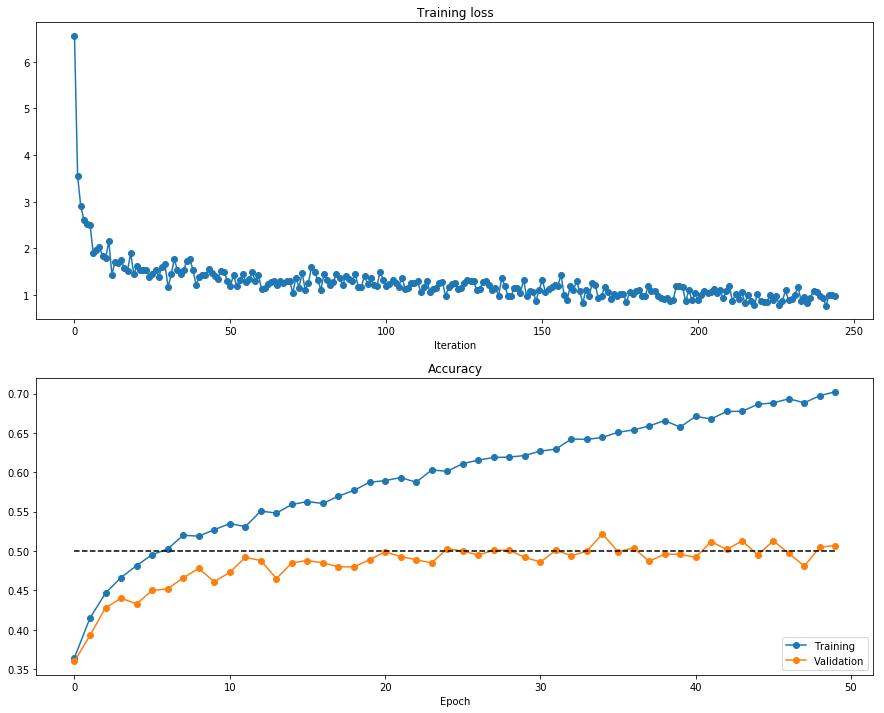

In [22]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Different Optimizers
There are several more advanced optimizers than vanilla SGD, you will implement three more sophisticated and widely-used methods in this section.  
Please complete the TODOs in the `lib/optim.py`.

## SGD + Momentum
The update rule of SGD plus momentum is as shown below:  
\begin{equation}
v_t: last\ update\ of\ the\ velocity \\
\gamma: momentum \\
\eta: learning\ rate \\
v_t = \gamma v_{t-1} - \eta \nabla_{\theta}J(\theta) \\
\theta = \theta + v_t
\end{equation}
Complete the `SGDM()` function in `lib/optim.py`.

In [23]:
# Test the implementation of SGD with Momentum
N, D = 4, 5
test_sgd = sequential(fc(N, D, name="sgd_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_sgd.layers[0].params = {"sgd_fc_w": w}
test_sgd.layers[0].grads = {"sgd_fc_w": dw}

test_sgd_momentum = SGDM(test_sgd, 1e-3, 0.9)
test_sgd_momentum.velocity = {"sgd_fc_w": v}
test_sgd_momentum.step()

updated_w = test_sgd.layers[0].params["sgd_fc_w"]
velocity = test_sgd_momentum.velocity["sgd_fc_w"]

expected_updated_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print ('The following errors should be around or less than 1e-8')
print ('updated_w error: ', rel_error(updated_w, expected_updated_w))
print ('velocity error: ', rel_error(expected_velocity, velocity))

The following errors should be around or less than 1e-8
updated_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


Run the following code block to train a multi-layer fully connected network with both SGD and SGD plus Momentum. The network trained with SGDM optimizer should converge faster.

Training with Vanilla SGD...
(Iteration 1 / 200) loss: 2.5527077078956064
(Epoch 1 / 5) Training Accuracy: 0.296, Validation Accuracy: 0.268
(Epoch 2 / 5) Training Accuracy: 0.3435, Validation Accuracy: 0.307
(Iteration 101 / 200) loss: 1.7416258267069216
(Epoch 3 / 5) Training Accuracy: 0.3665, Validation Accuracy: 0.301
(Epoch 4 / 5) Training Accuracy: 0.4115, Validation Accuracy: 0.323
(Epoch 5 / 5) Training Accuracy: 0.4445, Validation Accuracy: 0.34

Training with SGD plus Momentum...
(Iteration 1 / 200) loss: 2.4402610759755476
(Epoch 1 / 5) Training Accuracy: 0.29775, Validation Accuracy: 0.268
(Epoch 2 / 5) Training Accuracy: 0.39275, Validation Accuracy: 0.318
(Iteration 101 / 200) loss: 1.7404244520151189
(Epoch 3 / 5) Training Accuracy: 0.421, Validation Accuracy: 0.328
(Epoch 4 / 5) Training Accuracy: 0.4935, Validation Accuracy: 0.359
(Epoch 5 / 5) Training Accuracy: 0.488, Validation Accuracy: 0.342


/Users/akankshadiwedy/anaconda2/envs/csci599/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


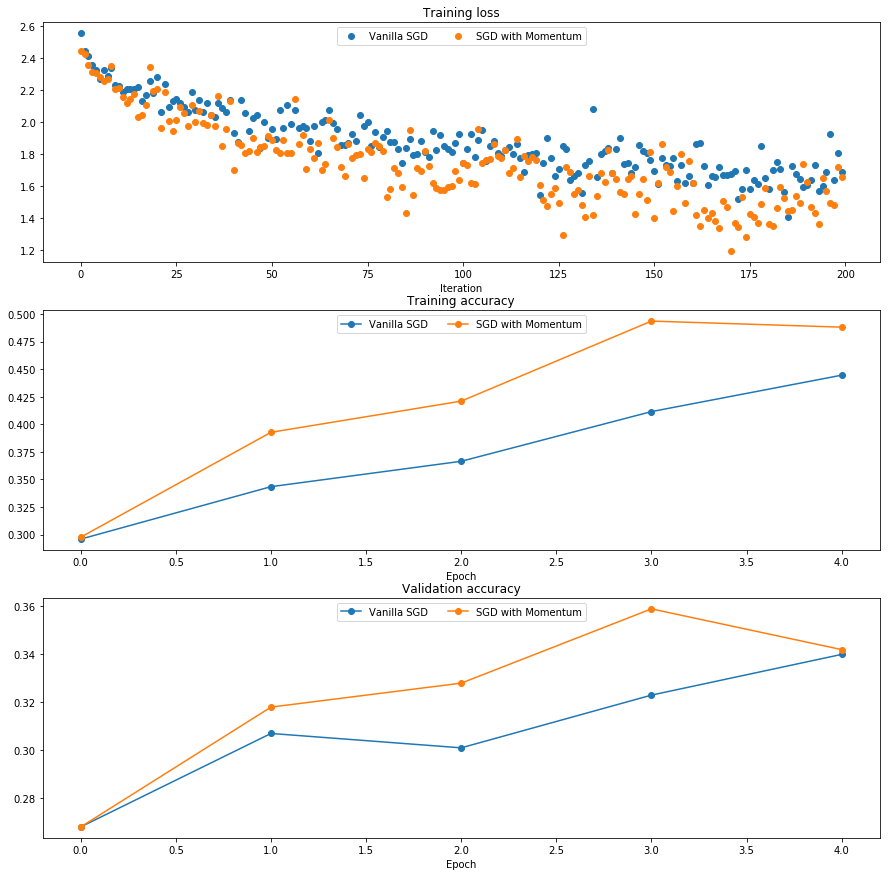

In [24]:
# Arrange a small data
num_train = 4000
small_data_dict = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

model_sgd      = FullyConnectedNetwork()
model_sgdm     = FullyConnectedNetwork()
loss_f_sgd     = cross_entropy()
loss_f_sgdm    = cross_entropy()
optimizer_sgd  = SGD(model_sgd.net, 1e-2)
optimizer_sgdm = SGDM(model_sgdm.net, 1e-2, 0.9)

print ("Training with Vanilla SGD...")
results_sgd = train_net(small_data_dict, model_sgd, loss_f_sgd, optimizer_sgd, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with SGD plus Momentum...")
results_sgdm = train_net(small_data_dict, model_sgdm, loss_f_sgdm, optimizer_sgdm, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_sgd,  loss_hist_sgd,  train_acc_hist_sgd,  val_acc_hist_sgd  = results_sgd
opt_params_sgdm, loss_hist_sgdm, train_acc_hist_sgdm, val_acc_hist_sgdm = results_sgdm

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp
The update rule of RMSProp is as shown below:  
\begin{equation}
\gamma: decay\ rate \\
\epsilon: small\ number \\
g_t^2: squared\ gradients \\
\eta: learning\ rate \\
E[g^2]_t: decaying\ average\ of\ past\ squared\ gradients\ at\ update\ step\ t \\
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 \\
\theta_{t+1} = \theta_t - \frac{\eta \nabla_{\theta}J(\theta)}{\sqrt{E[g^2]_t+\epsilon}}
\end{equation}
Complete the RMSProp() function in optim.py

In [25]:
%reload_ext autoreload

# Test RMSProp implementation; you should see errors less than 1e-7
N, D = 4, 5
test_rms = sequential(fc(N, D, name="rms_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_rms.layers[0].params = {"rms_fc_w": w}
test_rms.layers[0].grads = {"rms_fc_w": dw}

opt_rms = RMSProp(test_rms, 1e-2, 0.99)
opt_rms.cache = {"rms_fc_w": cache}
opt_rms.step()

updated_w = test_rms.layers[0].params["rms_fc_w"]
cache = opt_rms.cache["rms_fc_w"]

expected_updated_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('cache error: ', rel_error(expected_cache, opt_rms.cache["rms_fc_w"]))

The following errors should be around or less than 1e-7
updated_w error:  9.502645229894295e-08
cache error:  2.6477955807156126e-09


## Adam
The update rule of Adam is as shown below:  
\begin{equation}
t = t + 1 \\
g_t: gradients\ at\ update\ step\ t \\
m_t = \beta_1m_{t-1} + (1-\beta_1)g_t \\
v_t = \beta_2v_{t-1} + (1-\beta_2)g_t^2 \\
\hat{m_t} = m_t / (1 - \beta_1^t) \\
\hat{v_t} = v_t / (1 - \beta_2^t) \\
\theta_{t+1} = \theta_t - \frac{\eta\ \hat{m_t}}{\sqrt{\hat{v_t}}+\epsilon} \\
\end{equation}
Complete the Adam() function in optim.py

In [26]:
%reload_ext autoreload

# Test Adam implementation; you should see errors around 1e-7 or less
N, D = 4, 5
test_adam = sequential(fc(N, D, name="adam_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

test_adam.layers[0].params = {"adam_fc_w": w}
test_adam.layers[0].grads = {"adam_fc_w": dw}

opt_adam = Adam(test_adam, 1e-2, 0.9, 0.999, t=5)
opt_adam.mt = {"adam_fc_w": m}
opt_adam.vt = {"adam_fc_w": v}
opt_adam.step()

updated_w = test_adam.layers[0].params["adam_fc_w"]
mt = opt_adam.mt["adam_fc_w"]
vt = opt_adam.vt["adam_fc_w"]

expected_updated_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('mt error: ', rel_error(expected_m, mt))
print ('vt error: ', rel_error(expected_v, vt))

The following errors should be around or less than 1e-7
updated_w error:  1.1395691798535431e-07
mt error:  4.214963193114416e-09
vt error:  4.208314038113071e-09


## Comparing the optimizers
Run the following code block to compare the plotted results among all the above optimizers. You should see SGD with Momentum, RMSProp, and Adam optimizers work better than Vanilla SGD optimizer.

Training with RMSProp...
(Iteration 1 / 200) loss: 2.5602392777705503
(Epoch 1 / 5) Training Accuracy: 0.36725, Validation Accuracy: 0.301
(Epoch 2 / 5) Training Accuracy: 0.42825, Validation Accuracy: 0.336
(Iteration 101 / 200) loss: 1.6969855986586884
(Epoch 3 / 5) Training Accuracy: 0.47475, Validation Accuracy: 0.34
(Epoch 4 / 5) Training Accuracy: 0.55025, Validation Accuracy: 0.373
(Epoch 5 / 5) Training Accuracy: 0.58575, Validation Accuracy: 0.342

Training with Adam...
(Iteration 1 / 200) loss: 3.1248914424756533
(Epoch 1 / 5) Training Accuracy: 0.3605, Validation Accuracy: 0.303
(Epoch 2 / 5) Training Accuracy: 0.45, Validation Accuracy: 0.343
(Iteration 101 / 200) loss: 1.543672910230849
(Epoch 3 / 5) Training Accuracy: 0.50225, Validation Accuracy: 0.378
(Epoch 4 / 5) Training Accuracy: 0.568, Validation Accuracy: 0.391
(Epoch 5 / 5) Training Accuracy: 0.61675, Validation Accuracy: 0.358


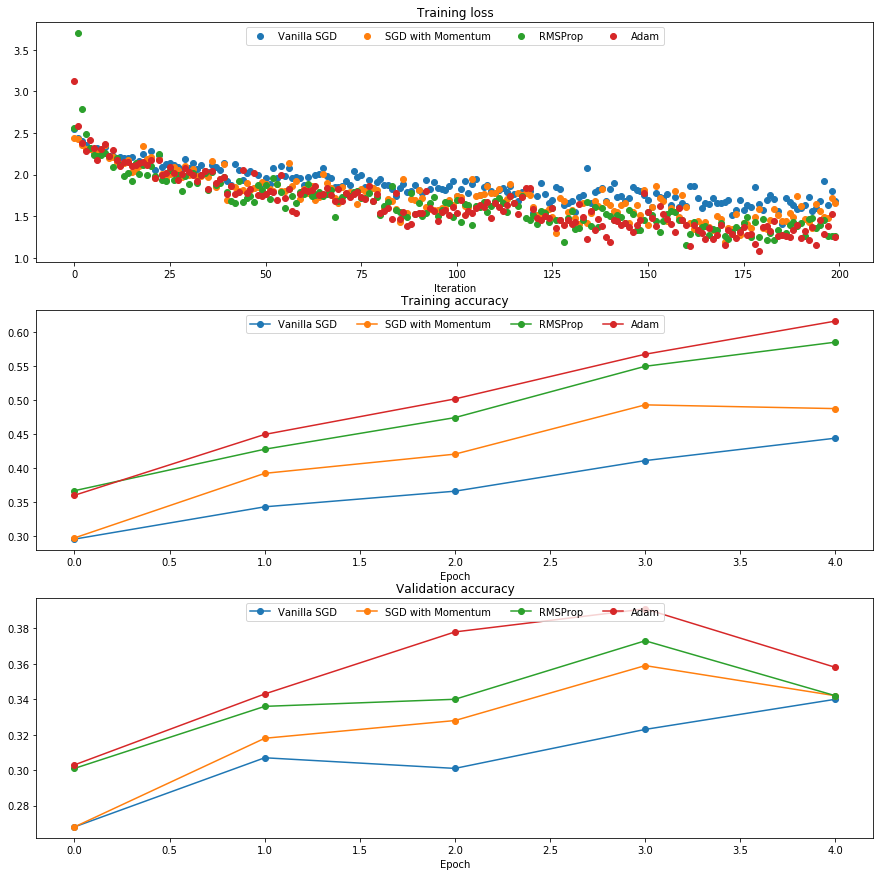

In [27]:
model_rms      = FullyConnectedNetwork()
model_adam     = FullyConnectedNetwork()
loss_f_rms     = cross_entropy()
loss_f_adam    = cross_entropy()
optimizer_rms  = RMSProp(model_rms.net, 5e-4)
optimizer_adam = Adam(model_adam.net, 5e-4)

print ("Training with RMSProp...")
results_rms = train_net(small_data_dict, model_rms, loss_f_rms, optimizer_rms, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with Adam...")
results_adam = train_net(small_data_dict, model_adam, loss_f_adam, optimizer_adam, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_rms,  loss_hist_rms,  train_acc_hist_rms,  val_acc_hist_rms  = results_rms
opt_params_adam, loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = results_adam

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")

plt.subplot(3, 1, 1)
plt.plot(loss_hist_rms, 'o', label="RMSProp")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_rms, '-o', label="RMSProp")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_rms, '-o', label="RMSProp")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_adam, 'o', label="Adam")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_adam, '-o', label="Adam")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_adam, '-o', label="Adam")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Training a Network with Dropout
Run the following code blocks to compare the results with and without dropout

In [28]:
# Train two identical nets, one with dropout and one without
num_train = 200
data_dict_500 = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

solvers = {}
keep_ps = [0, 0.25, 0.50, 0.75]

results_dict = {}
for keep_prob in keep_ps:
    results_dict[keep_prob] = {}

for keep_prob in keep_ps:
    print ("Dropout Keep Prob =", keep_prob)
    model = DropoutNetTest(keep_prob=keep_prob)
    loss_f = cross_entropy()
    optimizer = SGD(model.net, 1e-4)
    results = train_net(data_dict_500, model, loss_f, optimizer, batch_size=100, 
                        max_epochs=25, show_every=100, verbose=True)
    opt_params, loss_hist, train_acc_hist, val_acc_hist = results
    results_dict[keep_prob] = {
        "opt_params": opt_params, 
        "loss_hist": loss_hist, 
        "train_acc_hist": train_acc_hist, 
        "val_acc_hist": val_acc_hist
    }

Dropout Keep Prob = 0
(Iteration 1 / 50) loss: 2.3025850929940455
(Epoch 1 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 2 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 3 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 4 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 5 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 6 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 7 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 8 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 9 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 10 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 11 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 12 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 13 / 25) Training Accuracy: 0.08, Validation Accuracy: 0.089
(Epoch 14 / 25) Training Accuracy: 0.08, Validation Accurac

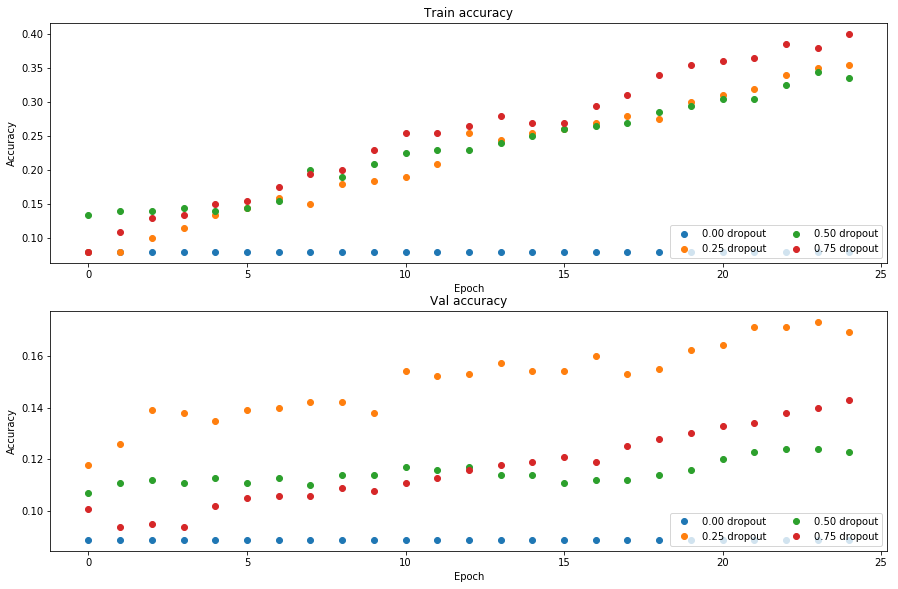

In [29]:
# Plot train and validation accuracies of the two models
train_accs = []
val_accs = []
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    train_accs.append(curr_dict["train_acc_hist"][-1])
    val_accs.append(curr_dict["val_acc_hist"][-1])

plt.subplot(3, 1, 1)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["train_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["val_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

### Inline Question: Describe what you observe from the above results and graphs
#### Ans: The highest training accuracy was achieved by 0.75 dropout whereas with no dropout the training accuracy was the lowest. Also the highest validation accuracy was achieved by 0.25 dropout whereas with no dropout the validation accuracy was the lowest.

## Plot the Activation Functions
In each of the activation function, use the given lambda function template to plot their corresponding curves.

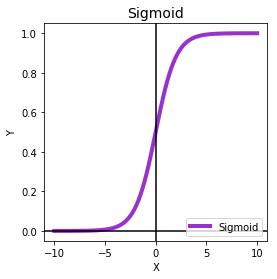

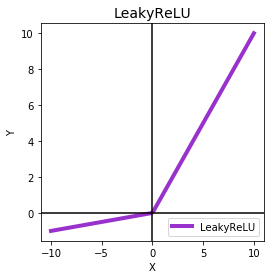

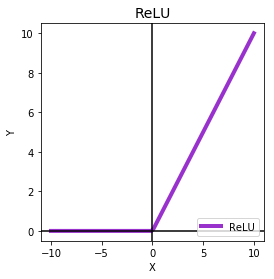

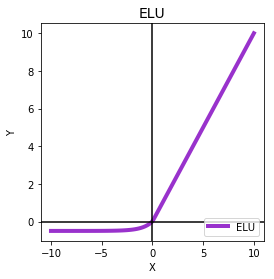

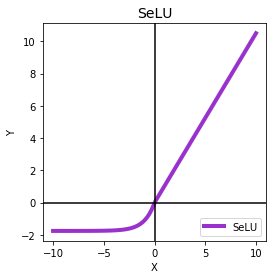

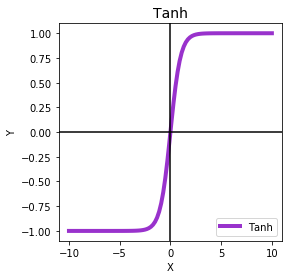

In [30]:
left, right = -10, 10
X  = np.linspace(left, right, 100)
XS = np.linspace(-5, 5, 10)
lw = 4
alpha = 0.1 # alpha for leaky_relu
elu_alpha = 0.5
selu_alpha = 1.6732
selu_scale = 1.0507

#########################
####### YOUR CODE #######
#########################
sigmoid = lambda x: (1/(1+np.exp(x*-1)))
leaky_relu = lambda x: x * (x > 0) + (x<0) * alpha*x                           
relu = lambda x: x * (x > 0) + (x<0) * 0
elu = lambda x: x * (x > 0) + (x<0) * elu_alpha*(np.exp(x)-1)
selu = lambda x: selu_scale*((x) * (x > 0) + (x<0) * selu_alpha*(np.exp(x)-1))
tanh = lambda x: np.tanh(x)
#########################
### END OF YOUR CODE ####
#########################

activations = {
    "Sigmoid": sigmoid,
    "LeakyReLU": leaky_relu,
    "ReLU": relu,
    "ELU": elu,
    "SeLU": selu,
    "Tanh": tanh
}

# Ground Truth activations
GT_Act = {
    "Sigmoid": [0.00669285092428, 0.0200575365379, 0.0585369028744, 0.158869104881, 0.364576440742, 
                0.635423559258, 0.841130895119, 0.941463097126, 0.979942463462, 0.993307149076],
    "LeakyReLU": [-0.5, -0.388888888889, -0.277777777778, -0.166666666667, -0.0555555555556, 
                  0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ReLU": [-0.0, -0.0, -0.0, -0.0, -0.0, 0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ELU": [-0.4966310265, -0.489765962143, -0.468911737989, -0.405562198581, -0.213123289631, 
            0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "SeLU": [-1.74618571868, -1.72204772347, -1.64872296837, -1.42598202974, -0.749354802287, 
             0.583722222222, 1.75116666667, 2.91861111111, 4.08605555556, 5.2535],
    "Tanh": [-0.999909204263, -0.999162466631, -0.992297935288, -0.931109608668, -0.504672397722, 
             0.504672397722, 0.931109608668, 0.992297935288, 0.999162466631, 0.999909204263]
} 

for label in activations:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X, activations[label](X), color='darkorchid', lw=lw, label=label)
    assert rel_error(activations[label](XS), GT_Act[label]) < 1e-9, \
           "Your implementation of {} might be wrong".format(label)
    ax.legend(loc="lower right")
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('{}'.format(label), fontsize=14)
    plt.xlabel(r"X")
    plt.ylabel(r"Y")
    plt.show()